# Import necessary libraries and load the data Set

In [1]:
#Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing datasets
train_data=pd.read_excel("Datasets/Data_Train.xlsx")
test_data=pd.read_excel("Datasets/Test_set.xlsx")

# Initial Data analysis

In [3]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Bangalore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Bangalore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:
test_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.loc[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
train_data.loc[train_data['Total_Stops'].isnull()]
train_data=train_data[~train_data.Total_Stops.isnull()]

In [10]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Data Wrangling

In [11]:
#Combing test and train data
combine=train_data.append(test_data,sort=False)
combine.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [12]:
test_data.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [13]:
# Combining the Date of Journey and Departure Columns and converting it into Datetime format

#combine.Date_of_Journey.str.replace('/', '-')
#combined = combine.Date_of_Journey.str.cat(combine.Dep_Time, sep=' ')
#combine['Date_Time_Dep'] = pd.to_datetime(combined)

In [14]:
# Setting the Datetime column as Index

#combine.set_index('Date_Time_Dep', inplace=True)

In [15]:
combine['Total_Stops']=combine['Total_Stops'].str.replace("2 stops",'2')
combine['Total_Stops']=combine['Total_Stops'].str.replace("3 stops",'3')
combine['Total_Stops']=combine['Total_Stops'].str.replace("4 stops",'4')
combine['Total_Stops']=combine['Total_Stops'].str.replace("1 stop",'1')
combine['Total_Stops']=combine['Total_Stops'].str.replace("non-stop",'0')
combine.Total_Stops= combine.Total_Stops.astype(int)

In [16]:
combine.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Bangalore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0
1,Air India,1/05/2019,Kolkata,Bangalore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Bangalore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0
4,IndiGo,01/03/2019,Bangalore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0


In [17]:
combine.loc[combine['Total_Stops'].isnull()]



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [18]:
x=combine[combine['Source'].str.match('Delhi') & combine['Destination'].str.match('Cochin')]
x[['Route','Total_Stops','Duration']]

,Route,Total_Stops,Duration
2,DEL → LKO → BOM → COK,2,19h
9,DEL → BOM → COK,1,7h 50m
10,DEL → BLR → COK,1,13h 15m
15,DEL → AMD → BOM → COK,2,26h 35m
16,DEL → PNQ → COK,1,4h 30m
...,...,...,...
2661,DEL → AMD → BOM → COK,2,33h 15m
2664,DEL → BOM → COK,1,10h 15m
2668,DEL → BOM → COK,1,6h 35m
2669,DEL → BOM → COK,1,15h 15m


In [19]:
h = combine['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = combine['Duration'].str.extract('(\d+)m', expand=False).astype(float)

combine['Duration'] = h.add(m, fill_value=0).astype(int)


In [20]:
combine.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Bangalore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897.0
1,Air India,1/05/2019,Kolkata,Bangalore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Bangalore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218.0


In [21]:
combine.drop(['Route'],axis=1)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Bangalore,New Delhi,22:20,01:10 22 Mar,170,0,No info,3897.0
1,Air India,1/05/2019,Kolkata,Bangalore,05:50,13:15,445,2,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,1140,2,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Bangalore,18:05,23:30,325,1,No info,6218.0
4,IndiGo,01/03/2019,Bangalore,New Delhi,16:50,21:35,285,1,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,20:30,20:25 07 Jun,1435,1,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,14:20,16:55,155,0,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,21:50,04:25 07 Mar,395,1,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,04:00,19:15,915,1,No info,NaN


In [22]:
# Converting Dep_Time from object (string) to time format

combine.Dep_Time=pd.to_datetime(combine.Dep_Time, format = '%H:%M').dt.time

In [23]:
# String manipulation to extract only hours and minutes from arrival_time column and dropping the date part, then 
# converting the string to time format as done above

combine.Arrival_Time=combine.Arrival_Time.str.slice(0,6)
combine.Arrival_Time=combine.Arrival_Time.str.strip()
combine.Arrival_Time=pd.to_datetime(combine.Arrival_Time, format = '%H:%M').dt.time

In [24]:
combine=combine[['Date_of_Journey','Airline','Dep_Time','Source','Arrival_Time','Destination','Duration','Total_Stops','Additional_Info','Price']]

In [25]:
combine.head(5)

,Date_of_Journey,Airline,Dep_Time,Source,Arrival_Time,Destination,Duration,Total_Stops,Additional_Info,Price
0,24/03/2019,IndiGo,22:20:00,Bangalore,01:10:00,New Delhi,170,0,No info,3897.0
1,1/05/2019,Air India,05:50:00,Kolkata,13:15:00,Bangalore,445,2,No info,7662.0
2,9/06/2019,Jet Airways,09:25:00,Delhi,04:25:00,Cochin,1140,2,No info,13882.0
3,12/05/2019,IndiGo,18:05:00,Kolkata,23:30:00,Bangalore,325,1,No info,6218.0
4,01/03/2019,IndiGo,16:50:00,Bangalore,21:35:00,New Delhi,285,1,No info,13302.0


In [26]:
combine.shape

(13353, 10)

In [27]:
train_data=combine[0:10682]

In [28]:
test_data=combine[10682:]

In [29]:
train_data.tail(1)

,Date_of_Journey,Airline,Dep_Time,Source,Arrival_Time,Destination,Duration,Total_Stops,Additional_Info,Price
10682,9/05/2019,Air India,10:55:00,Delhi,19:15:00,Cochin,500,2,No info,11753.0


In [30]:
test_data.head(1)

,Date_of_Journey,Airline,Dep_Time,Source,Arrival_Time,Destination,Duration,Total_Stops,Additional_Info,Price
0,6/06/2019,Jet Airways,17:30:00,Delhi,04:25:00,Cochin,655,1,No info,NaN


# Explonatory Data Analysis

Text(0.5, 0, 'Price')

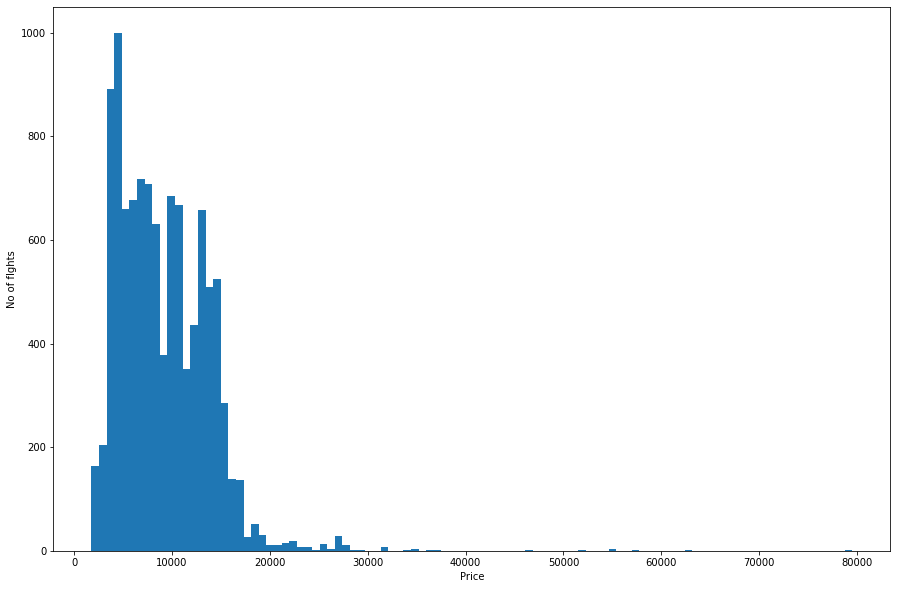

In [31]:
train_data['Price'].plot.hist(figsize=[15,10], bins=100)
plt.ylabel('No of flghts')
plt.xlabel('Price')
#plt.xticks(range(0,40000,10000))

We Can see that most of the flights are in the range **5000 to 16000** mostly and some flights are above **20000** and we can't treat them as outliers because they are high due to business class or with some extra benefits

In [32]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64

Text(0.5, 0, 'No of flights')

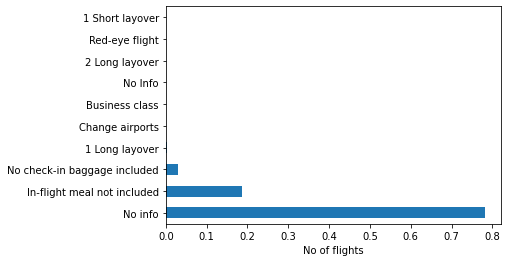

In [33]:
train_data['Additional_Info'].value_counts(normalize=True).plot.barh()
plt.xlabel('No of flights')

We can see nearly **80 percent** of flights don't have any additional information and flights with additional info as **meal not included** are **18 percent** 

Text(0, 0.5, 'Frequency')

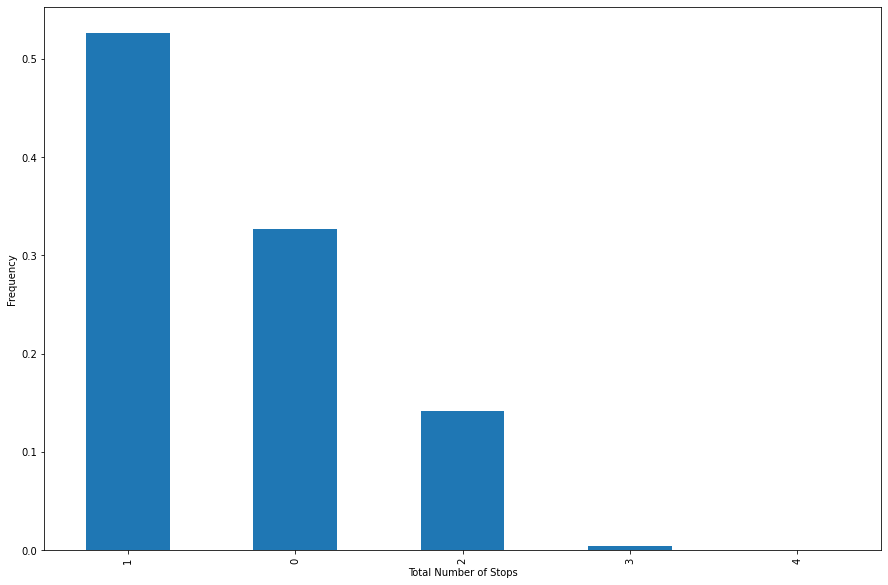

In [34]:
# Plot showing the frequency of total number of stops of the flights

train_data['Total_Stops'].value_counts(normalize=True).plot.bar(figsize=[15,10])
plt.xlabel('Total Number of Stops')
plt.ylabel('Frequency')

As it can be seen from the **Barplot** here the flights that have 1 stop are highest in number followed by flights with 0 stop and then 2 stops respectively. This trend shows that in India most of the flights are connecting flights with **1 stop** having a frequency of **52.66%** followed by **32.68%** flights with **0 stops** and **14.23%** flights with **2 stops**. Also there are very less number of flights with 3 stops and one single flight having 4 stops.

Text(0.5, 0, 'No Of flights')

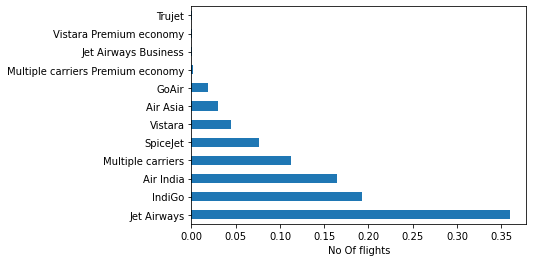

In [35]:
train_data['Airline'].value_counts(normalize=True).plot.barh()
plt.xlabel('No Of flights')

This is a **Horizontal Barplot** showing the Number of Flights of different Airlines in the dataset. The highest number of flights are of **Jet Airways** with a share of approxiamately **36%**. This suggest that **1/3rd** proportion of the flights in India are of **Jet Airways**. These can be direct or flights with 1 or 2 stops. The next top Airline in India is **IndiGo** with **19.22%** very closely follows the **Air India** airlines with **16.4%** flights in the market. The other airlines economical airlines such as **SpiceJet**, **Vistara**, **Air Asia**, **GoAir** shows that they don't have much connectivity in India.

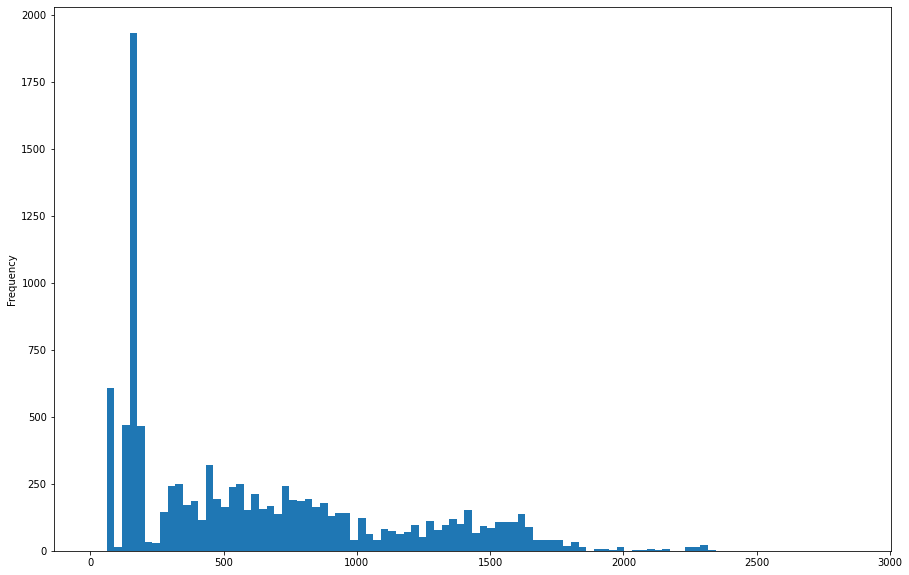

In [36]:
train_data['Duration'].plot.hist(figsize=[15,10],bins=100)

The highest number of flights are of **Duration** within **100-200 minutes** that is **1.40 to 3.20 hours**. Also there are certain number of flights between **300 to 1000 minutes**. It show that people mostly prefer flights with less Duration but also lot of the population takes connecting flight to reach smaller places around India.

# Bivarate Analysis

Text(0, 0.5, 'Airlines')

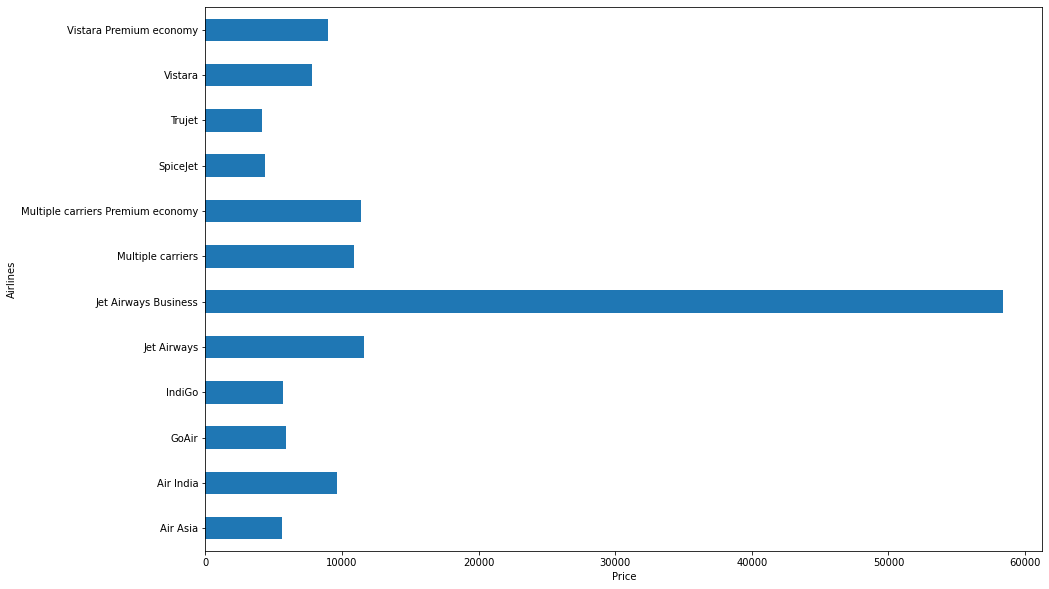

In [37]:
# Plot relating to different Airlines and their Price

train_data.groupby('Airline')['Price'].mean().plot.barh(figsize=[15,10])
plt.xlabel('Price')
plt.ylabel('Airlines')

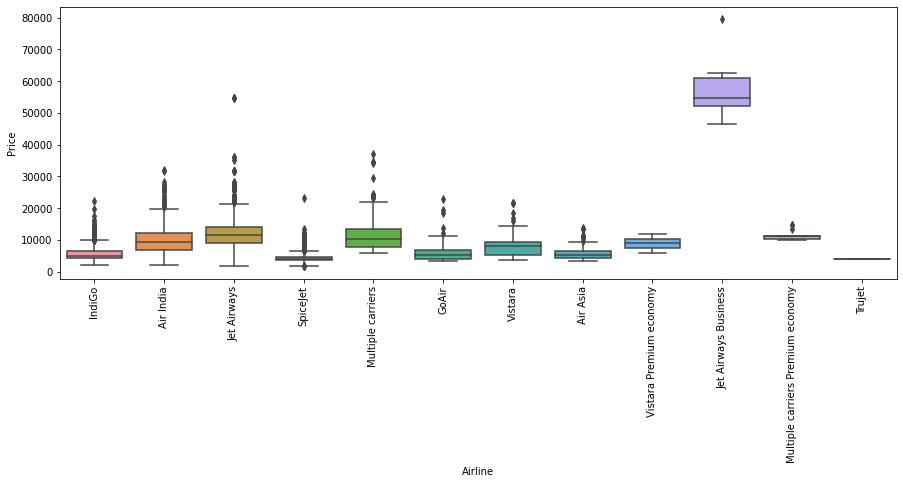

In [38]:
# Boxplot showing the Spread of the Price of different Airlines

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train_data.Airline, train_data.Price)

It can be observed here that **Jet Airways Business** airline has the costliest ticket in India. But all other **Economical Airlines** have their ticket price within **10000**. In the **Boxplot** every airline is having certain number of outlier but those are present there because of **Total Stops** of the flight. The number of stops increases the flight ticket price decreases accordingly.

Text(0, 0.5, 'Price')

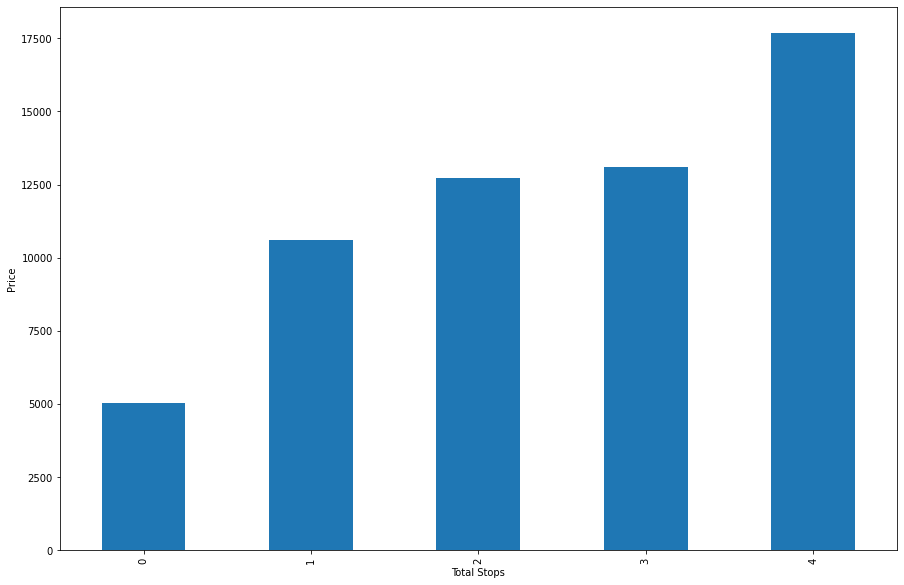

In [39]:
# Bar plot showing the trends in Price with resprct to number of Stops

train_data.groupby('Total_Stops')['Price'].mean().plot.bar(figsize=[15,10])
plt.xlabel('Total Stops')
plt.ylabel('Price')

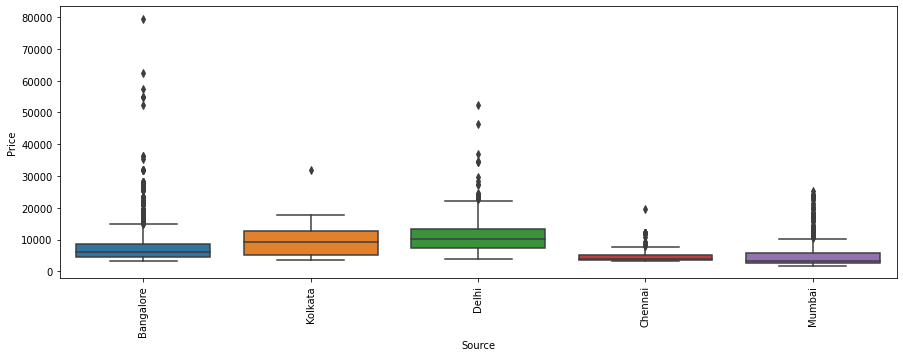

In [40]:
# Boxplot showing the spread of Price for different Source of the flights

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train_data.Source, train_data.Price)

This is a **Boxplot** showing the **Price** trends with the **Source** of the flights. It can be observed that flights taking off from **Bangalore** have certain extreme ticket price suggesting that most **Luxury Class Airlines** flights fly from **Bangalore** and closely followed is **Delhi**. The other places that are **Kolkata**, **Chennai** and **Mumbai** seem to have **Economical Flights** flying out these cities.

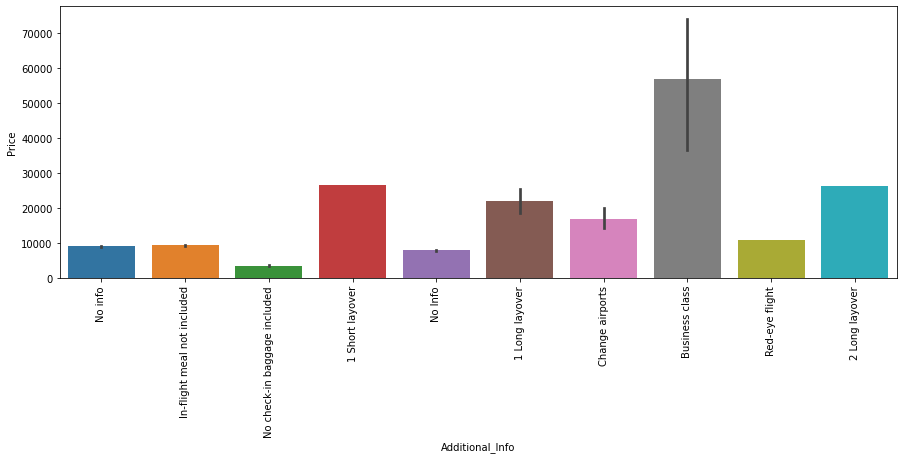

In [41]:
# Plot showing Additional details and the trends in Price of the tickets based on those

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(train_data.Additional_Info, train_data.Price )

From this **Bar Plot** we can truely come to the conclusion that **Business Class** ticket price is on the higher side. Also there is an unusual trend seen here that **1 Short Layover** and **2 Long Layover** have approximate similar price range. This can be because of many different reasons that during **2 Long layover** there would be multiple carriers of Airlines included. You cannot exactly tell the reason behind this trend.

This plot shows that the **Price** of the tickets **decreases** during the months of **March-April** and again **increases** after **April** and is stable after that.

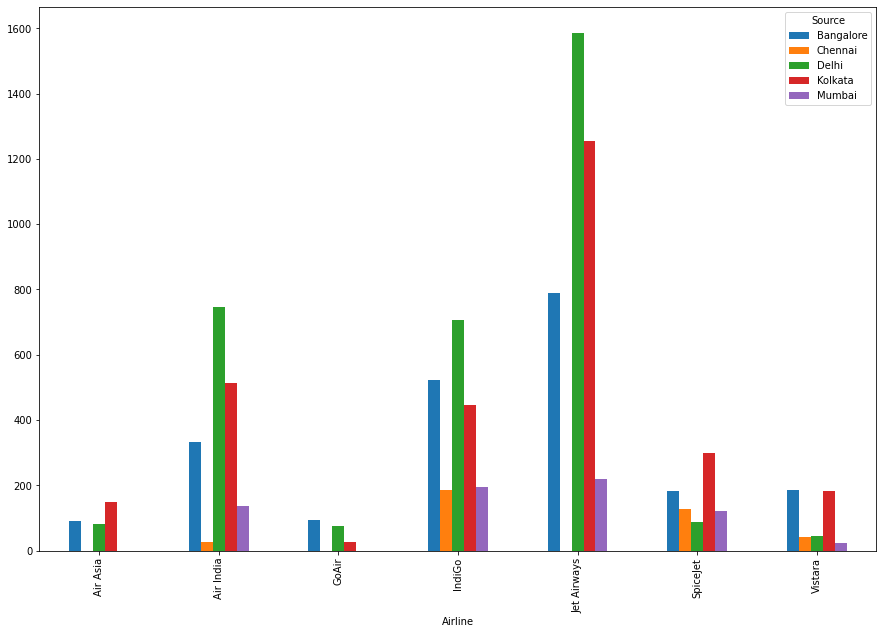

In [42]:
# Plot showing Airlines at different Source cities

table = pd.crosstab(train_data.Airline, train_data.Source)
table = table.loc[['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'SpiceJet', 'Vistara']]
table.plot(kind='bar', figsize=[15,10])

In this plot it can be seen the number of flights that take off for each Airlines in different cities of India. **Jet Airways** tops the list with most number of flights taking off from **Delhi** which is then followed by **Air India** and **IndiGo**. **Kolkata** has **2nd** highest number of flights of **Jet Airways** taking off from there with other few airlines **Air India**, **IndiGo** with less flights than **Jet Airways**. **Bangalore** again has a decent number of flights of **Jet Airways** and **IndiGo**. From **Chennai** it can be seen that there are very low or nil number of flights of **Air Asia**, **GoAir** and **Jet Airways** airlines. 

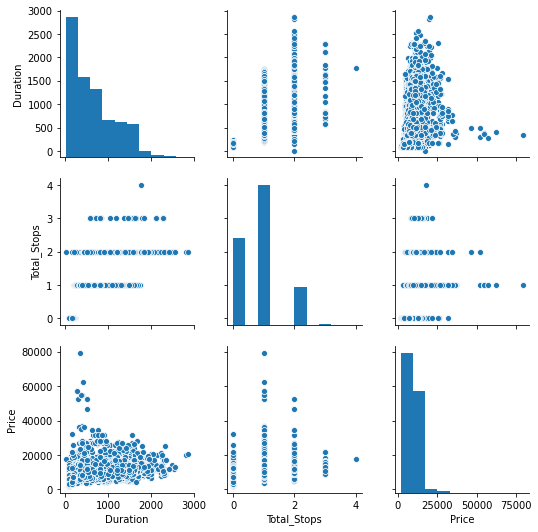

In [43]:
# Pairplot to show trends in different parameters of the flight

sns.pairplot(train_data)

Text(0.5, 0, 'Departure Time')

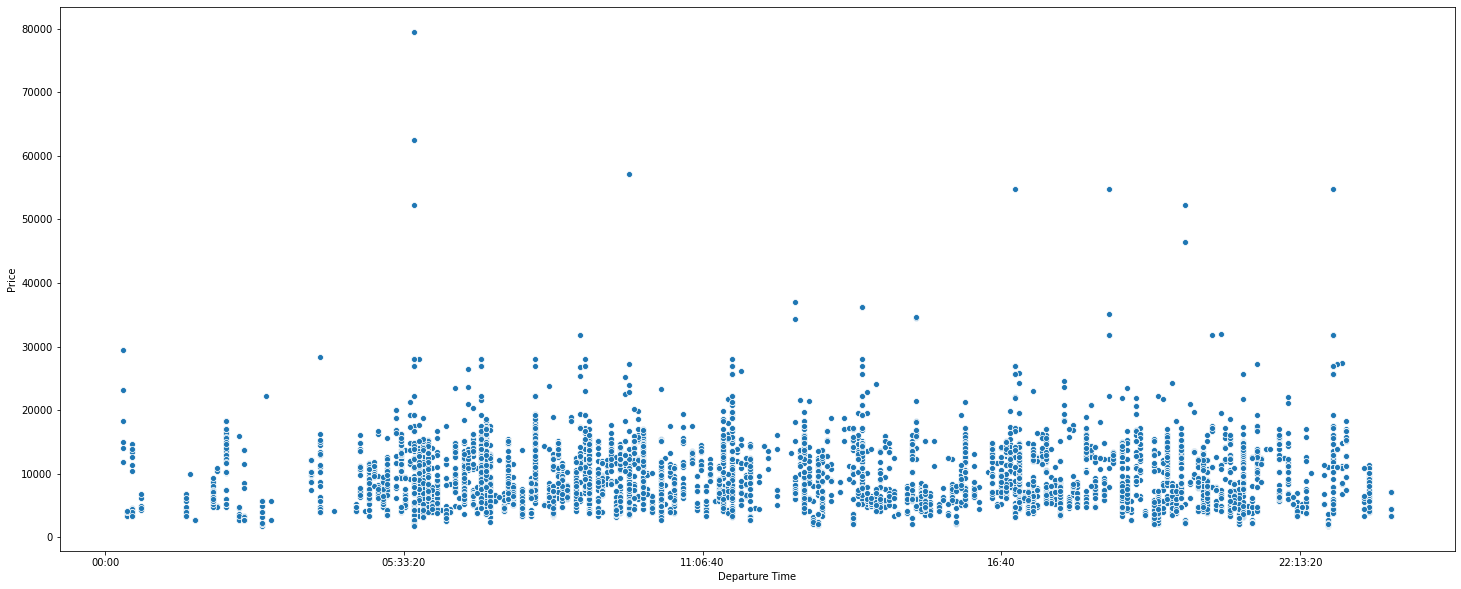

In [44]:
# Plot showing number of flights at different time to the day and their Price accordingly

plt.subplots(figsize=[25, 10])
sns.scatterplot(x='Dep_Time', y='Price', data=combine)
plt.xlabel('Departure Time')

The **Scatter Plot** clearly shows that the frequency of flights is the most from **5:30 Am to 11 AM** and again from **4:30 PM to 10 PM**. It obviously gives a clear trend that people mostly would prefer early morning to afternoon flights and again the evening flights. These times most of the people who are travelling for work can be seen on the flights. Also there are very few **Domestic Flights** operating in India during the **Midnight**. This suggests that there are very less flyers in the night times and most of the people prefer Daytime flights.

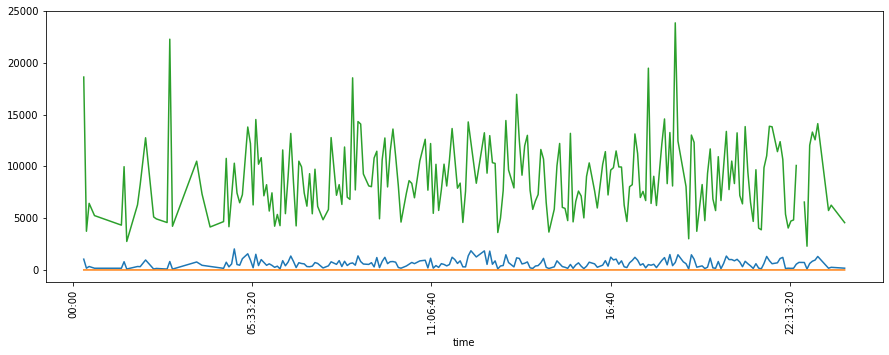

In [45]:
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.plot(combine.sort_values(['Dep_Time']).Dep_Time.unique(), combine.groupby(['Dep_Time']).mean())

In [46]:
combine.Total_Stops.corr(combine.Price)

0.6038969088067213

In [47]:
combine.Total_Stops.corr(combine.Price)

0.6038969088067213

# Modelling

In [48]:
combine.head()

,Date_of_Journey,Airline,Dep_Time,Source,Arrival_Time,Destination,Duration,Total_Stops,Additional_Info,Price
0,24/03/2019,IndiGo,22:20:00,Bangalore,01:10:00,New Delhi,170,0,No info,3897.0
1,1/05/2019,Air India,05:50:00,Kolkata,13:15:00,Bangalore,445,2,No info,7662.0
2,9/06/2019,Jet Airways,09:25:00,Delhi,04:25:00,Cochin,1140,2,No info,13882.0
3,12/05/2019,IndiGo,18:05:00,Kolkata,23:30:00,Bangalore,325,1,No info,6218.0
4,01/03/2019,IndiGo,16:50:00,Bangalore,21:35:00,New Delhi,285,1,No info,13302.0


In [49]:
combine=pd.get_dummies(combine)
combine.head(3)

,Duration,Total_Stops,Price,Date_of_Journey_01/03/2019,Date_of_Journey_03/03/2019,Date_of_Journey_06/03/2019,Date_of_Journey_09/03/2019,Date_of_Journey_1/03/2019,Date_of_Journey_1/04/2019,Date_of_Journey_1/05/2019,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,170,0,3897.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,445,2,7662.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1140,2,13882.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
train_new = combine.iloc[0:10682]

test_new = combine.iloc[10682:]
test_new = test_new.drop(['Price'], axis=1)

In [51]:
X = train_new.drop(['Price'], axis=1)

y = train_new.Price

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
lr.score(x_train,y_train)

0.8598100366525258

In [54]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
6075,16655.0,15734.535156
3544,4959.0,5622.808594
9291,9187.0,9037.042969
5032,3858.0,3819.843750
2483,12898.0,11478.478516
...,...,...
3022,13555.0,14746.988281
8416,12760.0,14184.496094
2605,3419.0,3834.658203
1392,5797.0,5069.388672


In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
ridge.score(x_test, y_test)

0.8326875571487419

In [56]:
from sklearn.model_selection import GridSearchCV
import numpy as np
l1_space = np.linspace(0, 1, 30)
ridge_params = {'alpha': l1_space}
g=GridSearchCV(Ridge(),param_grid=ridge_params,cv=5)
g.fit(x_train,y_train)
g_predict=g.predict(x_test)
g.score(x_test,y_test)

0.8426530806212795

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
lasso.score(x_test, y_test)

0.8394967504488562

In [58]:
from sklearn.linear_model import ElasticNet
l1_space = np.linspace(0, 1, 30)
ridge_params = {'alpha': l1_space}
elastic_net = ElasticNet()
g=GridSearchCV(elastic_net,param_grid=ridge_params,cv=5)
g.fit(x_train,y_train)
g_predict=g.predict(x_test)
g.score(x_test,y_test)

0.8375000431255618

In [59]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor
#l1_space = [20]
#decision_trees = {'n_estimators': l1_space}
#g=GridSearchCV(RandomForestRegressor(),param_grid=decision_trees,cv=5)
g=RandomForestRegressor(n_estimators=20,random_state=0)
g.fit(x_train,y_train)
g_predict=g.predict(x_test)
g.score(x_test,y_test)

0.8861032472671353

In [60]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor
#l1_space = [20]
#decision_trees = {'n_estimators': l1_space}
#g=GridSearchCV(RandomForestRegressor(),param_grid=decision_trees,cv=5)
g=RandomForestRegressor(n_estimators=200,random_state=0)
g.fit(x_train,y_train)
g_predict=g.predict(x_test)
g.score(x_test,y_test)

0.8877288289543237

In [61]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor
#l1_space = [20]
#decision_trees = {'n_estimators': l1_space}
#g=GridSearchCV(RandomForestRegressor(),param_grid=decision_trees,cv=5)
g=RandomForestRegressor(n_estimators=500,random_state=0)
g.fit(x_train,y_train)
g_predict=g.predict(x_test)
g.score(x_test,y_test)

0.8865962302014866